### Genetic algorithm to maximize a function by changing parameters

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import latex
import random
from sklearn.utils import shuffle
from statistics import mean

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Optimization Objective, Maximize:
$$ f(\beta_{1},\beta_{2},\beta_{3},\beta_{4},\beta_{5},\beta_{6}) = -\beta_{1} + \beta_{2} + \beta_{3} - \beta_{4} - \beta_{5} + \beta_{6} $$

This is a toy problem, with the only complexity being the occurance of mixed sign parameters. Note - this is especially trivial because the parameters are independent from one another.

In [2]:
def initialize_parameters():
    """ Returns random values between (-10,10)
    """    
    return np.random.rand(6)*10 * np.random.choice([1,-1],6)

In [3]:
def evaluate_fitness(parameters):
    """ Returns the evaluation of the function f(beta_1,...)
    """
    p = parameters
    return -p[0]+p[1]+p[2]-p[3]-p[4]+p[5]

In [4]:
def select_stongest_parents(parents):
    """ Returns the 4 (out of 8) parents with the largest fitness values
    """
    scores = [(parent,evaluate_fitness(parent)) for parent in parents] # [(parameters,score),...]
    scores.sort(key=lambda tup:tup[1], reverse=True)
    best_parents = [tup[0] for tup in scores[0:4]]
    best_fitness_values = [tup[1] for tup in scores[0:4]]
    return best_parents,best_fitness_values

In [5]:
def create_offspring(parents):
    """ Creates all possible parent/children genetic combinations (3!) and randomly selects 4
        Includes crossover and mutation.
    """
    children = [] # all created children
    for i in range(len(parents)):
        parent = parents[i]
        for j in range(i+1,len(parents)): # ging through remaining parents
            sub_parent = parents[j]
            cross_over_point = random.randint(1,4) # cross point allows each parent at least one parameter to change
            child = np.zeros((6,))
            child[:cross_over_point] = parent[:cross_over_point]
            child[cross_over_point:] = sub_parent[cross_over_point:]
            child = child * (np.random.rand(6)*2*np.random.choice([1,0],6)) # on avg half of the child cells will have mutations
            children.append(child)
            
    shuffle(children)
    return children[:4]

In [6]:
def genetric_algorithm(generations=50):
    """ Runs "natural selection" process for a set number of generations
    """
    parents = [initialize_parameters() for _ in range(8)] # initialize population of 8
    fitness_values = []
    for _ in range(generations):
        strongest_parents,best_fitness_values = select_stongest_parents(parents)
        fitness_values.append(mean(best_fitness_values))
        children = create_offspring(strongest_parents)
        parents = strongest_parents + children
    return fitness_values

In [7]:
fitness_values = genetric_algorithm(100)

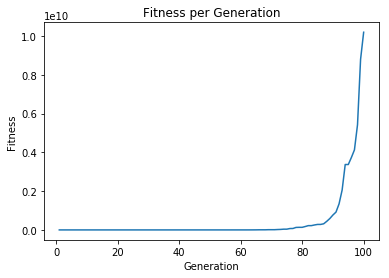

In [8]:
plt.plot([i for i in range(1,101)],fitness_values)
plt.title("Fitness per Generation")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()